### Recap:

## Problem statement:
    
Learn how to approximate a function, if you are given its values at discrete points. 

Let's say we know the function's values at points $x_j$, namely $f(x_j)$. 

We can find an *approximation* to the function $f(x)$, by a function $p (x)$. We can decompose the function $p(x)$ into a set of basis functions $\phi(x)$, multiplied by some coefficients $c_k$:

$ p(x) = \sum_{k=0}^{n-1} c_k \phi_k(x)$.

We will assume that the $\phi_k$ are linearly independent.

There are two distinct approaches of figuring out the right form for $p(x)$:
- interpolation
- approximation

# Interpolation II

## Background: the Fourier series expansion

A function $f(x)$ that is continuous and periodic can be expanded in an infinite series of sines and cosines, known as the Fourier series. 

Let us consider the function $f(x)$, which is real-valued, continuous and has a period of $2\pi$. Its Fourier series expansion is:

\begin{equation}
f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} (a_k cos(kx) + b_k sin(kx)) \,\,\,\, (1)
\end{equation}

This a sun of increasingly higher frequency (smaller wavelength) cosine and sine waves.

The coefficients of the cosines and sines are given by:

\begin{equation}
a_k = \frac{1}{\pi} \int_0^{2\pi} f(x)cos(kx) dx, \,\, k=0, 1, ...
\end{equation}

\begin{equation}
b_k = \frac{1}{\pi} \int_0^{2\pi} f(x)sin(kx) dx, \,\, k = 1, 2, ...
\end{equation}

The Fourier series can also be written with the use of complex exponentials, describing also complex-valued functions. 

Below you can see how the expansion works for the case of a square wave (a piece-wise constant periodic function, which alternates from values of 1 to -1 and back again). Change the number of terms k used in the expansion to see how the series gets closer to the true function.

#### Example of Fourier series expansion for the case of a square wave

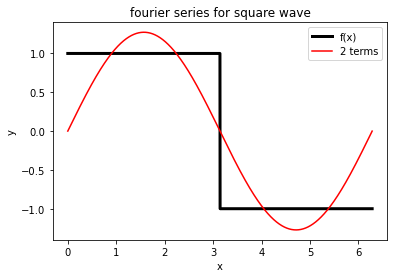

In [12]:
import numpy as np

import matplotlib.pyplot as plt

from scipy.signal import square

from scipy.integrate import quad # a method for solving an integral (we will see this in more detail next week)

x=np.arange(0,2*np.pi,0.001) 


y=square(x) #defining square wave function

# Define the integrands found inside the integrals for a_k and b_k
fc=lambda x:square(x)*np.cos(i*x) 

fs=lambda x:square(x)*np.sin(i*x)

k=2 #number of terms in sum, not taken infinity, better result with high value

Ak=[] 

Bk=[]

the_sum=0

for i in range(k):
    # compute a_k by integration
    ak=quad(fc,0,2*np.pi)[0]*(1.0/np.pi)

    Ak.append(ak)

for i in range(k):
    # note that for k = 0 the expression for b_0 evaluates to 0
    
    # compute b_k by integration
    bk=quad(fs,0,2*np.pi)[0]*(1.0/np.pi)

    Bk.append(bk)

for i in range(k):

    if i==0.0:

        the_sum+=Ak[i]/2

    else:

        the_sum+=(Ak[i]*np.cos(i*x)+Bk[i]*np.sin(i*x))


plt.plot(x,y,'k',lw = '3', label = 'f(x)')

plt.plot(x,the_sum,'r', label = '%d terms'%k)


plt.title("fourier series for square wave")

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Polynomial interpolation in the case of periodic data: sines and cosines

If our data are periodic, then our interpolating function $p(x)$ that tries to describe the true underlying function $f(x)$, should also be periodic.

The true function $f(x)$ can be decomposed in a Fourier series (assuming it is reasonably continuous):

\begin{equation}
f(x) = \frac{a_0}{2} + \sum_{k=1}^{\infty} (a_k cos(kx) + b_k sin(kx)) \,\,\,\, (1)
\end{equation}


For simplicity we will focus on the interval [0,2$\pi$). 
In the case that our data are periodic in time, t, we can generalize to the interval [0,T) where T is the period, with data points: $x = 2\pi t/T$.

Note that since the function is periodic, $f(0) = f(2\pi)$, and therefore there is no extra information at the point $2\pi$.


#### How can we define our interpolating function?
Say we have measured $f(x_j) = y_j$ at n points $x_j$ which are *equidistant in the interval [0, 2\pi)*: $x_j = 2\pi j/n$.

Since we only know the value of $f$ at the n distinct values of $x_j$, we won't be able to determine infinitely many $a_k, b_k$ coefficients from the Fourier series. Instead, we need to truncate the series (1). Since we have n data points, there will be n equations $y_j = p(x_j)$ that we can use to solve for some of the unknown $a_k, b_k$ parameters. This means we can only find n of these parameters. If n is an odd number: n = 2m+1 (where m is an integer), then our interpolating function $p$ takes the form:

\begin{equation}
p(x) = \frac{1}{2} a_0 + \sum_{k=1}^{m} (a_k coskx + b_k sinkx)
\end{equation}

In the case of n even, n = 2m and the interpolating function takes the form:

\begin{equation}
p(x) = \frac{1}{2} a_0 + \sum_{k=1}^{m-1} (a_k coskx + b_k sinkx) + \frac{1}{2} a_m cosmx
\end{equation}

A simple case:
If the function $f(x)$ is a simple cosine with a wavelength $\lambda = 2\pi \cdot 4/n$, then we expect to find all but one $a_k$ to be zero (or negligibly small in absolute terms). The non-zero $a_k$ will correspond to the k where: $k = \frac{2\pi}{\lambda}$, so in this case we will find for the non-zero $a_k$ term is $k =  n/4$.

To solve for the coefficients $a_k, b_k$ we need to use some properties of series where sines and cosines appear. The following relations are known as orthogonality relations for sines and cosines in the discrete case. That is, for our equally spaced grid one can show that (we will not do this):

\begin{equation}
\sum_{j=0}^{n-1} coskx_j coslx_j =   \left\{
\begin{array}{ll}
      0 & k\neq l \\
      m & 0 < k = l < m \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(2)   \\    
      2m & k = l = 0 \,\,{\rm{or}} \,\,k = l = m   
\end{array} 
\right.
\end{equation}

\begin{equation}
\sum_{j=0}^{n-1} coskx_j sinlx_j =   0 \,\,\,\,\,\,\,\,\,(3) 
\end{equation}

\begin{equation}
\sum_{j=0}^{n-1} sinkx_j sinlx_j =   \left\{
\begin{array}{ll}
      0 & k\neq l \\
      m & 0 < k = l < m \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,(4)\\
      0 & k = l = 0 \,\,{\rm{or}} \,\,k = l = m 
\end{array} 
\right.
\end{equation}




<font color='red'>Class exercise: Derive the equations shown below for the parameters $a_k, b_k$.</font>

The final equations we can use to find the parameters $a_k, b_k$ are:

\begin{equation}
a_k = \frac{1}{m} \sum_{j=0}^{n-1} y_j coskx_j, \,\,\,\,\,k = 0, 1, ....,m 
\end{equation}

\begin{equation}
b_k = \frac{1}{m} \sum_{j=0}^{n-1} y_j sinkx_j, \,\,\,\,\,k = 1,2,...,m-1 
\end{equation}


A problem in the assignment asks you to implement this interpolation method in Python. You can also check out the relevant section in the Numerical methods book, 6.4.2 Finite Series: Trigonometric interpolation.

# Approximation

## Approximation with linear models

We have $n$ data points $x_j, y_j, j = 0\ldots n-1$ and want to approximate the relation between $x$ and $y$ 
with a linear combination of $N$ functions $\phi_k, k = 0\ldots N-1$:

$$y_j = c_0 \phi_0(x_j) + c_1 \phi_1(x_j) + \ldots c_{N-1} \phi_{N-1}(x_j)$$

We assume that $n > N$, i.e. we have more data points than functions. *Remember in the interpolation case, we had $N = n$!*

> Note, that the relation between $y$ and $x$ is **linear in the coefficients** $c_k$, not in $x$!

## Case 1: no uncertainties in the data (or all points have equal uncertainties)

### Example: fitting a straight line

$$y_j = c_0 \cdot 1 + c_1 \cdot x_j = c_0 + c_1 x_j$$

So here $\phi_0 = 1$ and $\phi_1 = x$. 

We want to find the coefficients $c_0, c_1$ which minimize the quadratic deviations
("least squares"):

$$\min_{c_0,c_1} \cal{F(c_0, c_1)} = \min_{c_0,c_1}\sum_{i=0}^{m-1} \big(y_j - (c_0 + c_1 x_j)\big)^2$$

We can find that minimum by differentiating with respect to $c_0$ and $c_1$ and setting the derivatives equal to zero:

\begin{eqnarray}
0 = \frac{\partial \cal{F}}{\partial c_0} & = & - \sum_{j=0}^{n-1} 2\big(y_j - c_0 - c_1 x_j \big) \\
0 = \frac{\partial \cal{F}}{\partial c_1} & = & - \sum_{j=0}^{n-1} 2\big((y_j - c_0 - c_1 x_j) x_j \big)
\end{eqnarray}

Taking constants out of the sum and sorting terms, we get:

$$\begin{pmatrix}
\sum_{j=0}^{n-1} 1 & \sum_{j=0}^{n-1} x_j \\
\sum_{j=0}^{n-1} x_j & \sum_{j=0}^{n-1} x_j^2
\end{pmatrix}  
\begin{pmatrix}
c_0 \\
c_1
\end{pmatrix} = 
\begin{pmatrix}
\sum_{j=0}^{n-1} y_j \\
\sum_{j=0}^{n-1} x_j y_j
\end{pmatrix}
$$

Which is a system of linear equations, which can easily be solved to get $c_0$ and $c_1$.

Note, that the matrix 
$$\mathbf{A} = \begin{pmatrix}
\sum_{j=0}^{n-1} 1 & \sum_{j=0}^{n-1} x_j \\
\sum_{j=0}^{n-1} x_j & \sum_{j=0}^{n-1} x_j^2
\end{pmatrix}$$

can be written as 

$$\mathbf{A} = \mathbf{D}^{\mathsf{T}} \mathbf{D}, \quad {\rm where} \quad \mathbf{D} = 
\begin{pmatrix}
1 & x_0 \\
1 & x_1 \\
\vdots & \vdots \\
1 & x_{n-1}
\end{pmatrix}$$

and where $\mathbf{D}$ is the design matrix of this problem, which in this case is the Vandermonde matrix we have used for interpolation before. However, we are only using the first $n$ columns of the Vandermonde matrix, 
where $n$ is the order of the polynomial we want to fit.


We can write the vector
$$ \vec{y} = 
\begin{pmatrix}
y_0\\
y_1\\
\vdots\\
y_{n-1}
\end{pmatrix}
$$
then:

$$\mathbf{D}^{\mathsf{T}} \vec{y} = \begin{pmatrix}
1 & 1 & ...& 1\\
x_0  & x_1 & ... & x_{n-1}
\end{pmatrix}
\begin{pmatrix}
y_0\\
y_1\\
\vdots\\
y_{n-1}
\end{pmatrix} = 
\begin{pmatrix}
\sum_{j=0}^{n-1} x_j\\
\sum_{j=0}^{n-1} x_j y_j\\
\end{pmatrix}
$$

In short, the system of linear equations we solve is written as:

$$ \mathbf{D}^{\mathsf{T}} \mathbf{D} \vec{c} = \mathbf{D}^{\mathsf{T}} \vec{y}$$

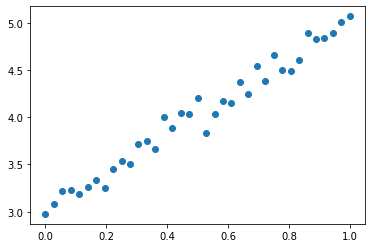

array([3.01861857, 2.00966428])

In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

M = 37
x = np.linspace(0.0, 1.0, M)
y = 2.0*x + 3.0 + 0.1*np.random.randn(M)
plt.scatter(x, y)
plt.show()

D = np.zeros((M, 2))
D[:, 0] = np.ones(M)
D[:, 1] = x

A = np.transpose(D) @ D
b = np.transpose(D) @ y
c = np.linalg.solve(A, b)
c                            # we expect [c[0] = 2.0, c[1] = 3.0]

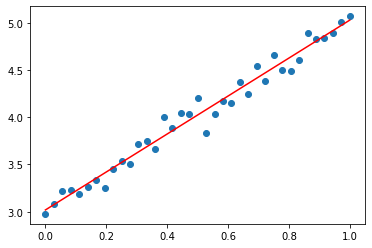

In [5]:
plt.scatter(x, y)
plt.plot(x, c[1]*x + c[0], color='red')
plt.show()

### General example (fitting a more general function)

It turns out, that in the general case

$$y_j = c_0 \phi_0(x_j) + c_1 \phi_1(x_j) + \ldots c_{N-1} \phi_{N-1}(x_j)$$

you will simply have to calculate your design matrix as 

$$\mathbf{D} = 
\begin{pmatrix}
\phi_0(x_0) & \phi_1(x_0) & \ldots & \phi_{N-1}({x_0}) \\
\phi_0(x_1) & \phi_1(x_1) & \ldots & \phi_{N-1}({x_1}) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(x_{n-1}) & \phi_1(x_{n-1}) & \ldots & \phi_{N-1}({x_{n-1}})
\end{pmatrix}$$

and we solve the same type of linear system:

$$\mathbf{D}^{\mathsf{T}} \mathbf{D} \vec{c} = \mathbf{D}^{\mathsf{T}} \vec{y}$$

### Example 2: fitting a sinusoidal function

$$y_j = a \cos(x_j + \theta)$$

with two parameters $a$ and $\theta$. But that relation is **not** linear in the parameter $\theta$, so we rewrite the equation as

$$y_j = a \big(\cos x_j \cos \theta - \sin x_j \sin \theta \big) = (a\cos \theta)\cos x_j - (a\sin\theta)\sin x_j$$

So our design matrix becomes

$$\mathbf{D} = 
\begin{pmatrix}
\cos x_0 & \sin x_0 \\
\cos x_1 & \sin x_1 \\
\vdots & \vdots \\
\cos x_{n-1} & \sin x_{n-1}
\end{pmatrix}$$

and we are fitting the two coefficients $c_0 = a\cos \theta$ and $c_1 = -a \sin \theta$, from which we can recover $a$ and $\theta$ as:

$$a = \sqrt{c_0^2 + c_1^2} \quad {\rm and} \quad \theta = \arctan\frac{-c_1}{c_0}$$

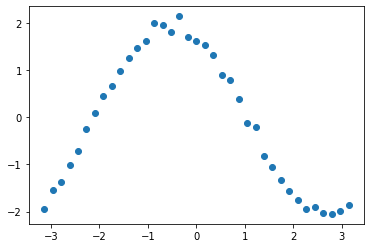

In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt

M = 37
x = np.linspace(-np.pi, np.pi, M)
y = 2.0*np.cos(x + math.radians(30.0)) + 0.1*np.random.randn(M)
plt.scatter(x, y)
plt.show()

D = np.zeros((M, 2))
D[:, 0] = np.cos(x)
D[:, 1] = np.sin(x)

In [7]:
A = np.transpose(D) @ D
b = np.transpose(D) @ y
c = np.linalg.solve(A, b)
c

array([ 1.74012047, -1.01149002])

In [8]:
a = np.sqrt(c[0]**2 + c[1]**2)
print(a)  

2.0127422372665333


In [9]:
phi = math.degrees(np.arctan2(-c[1], c[0]))
print(phi)                      # we expect 30 deg

30.1684030248851


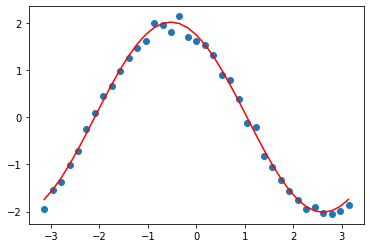

In [10]:
plt.scatter(x, y)
plt.plot(x, a*np.cos(x + math.radians(phi)), color='red')
plt.show()

## Case 2: least-squares fitting with uncertainties in the data 
(uncertainties which are different for different data points)

We have measurements $y_j$ at points $x_j$ with uncertainties $\sigma_j$.

In this case, our approximating function p(x) should not try too hard to pass by points with large uncertainties.

Instead of minimizing the squared distances to all points, we now minimize distances downweighted by the uncertainties of the data. This can be done by minimizing the $\chi$-squared function:

$$\chi^2 = \sum_{j=0}^{n-1} \big(\frac{y_j - p(x_j)}{\sigma_j}\big)^2$$

So now to find the $c_k$ that minimize the $\chi^2$ we solve the equations:
$$ \frac{\partial{\chi}^2}{\partial c_k} = 0$$

### Example: straight line fit with uncertainties

See also Numerical methods book section 6.5.2

To fit a straight line, our approximating function will again be: p(x) = c_0 + c_1 x.

The $\chi^2$ takes the form: $$ \chi^2 = \sum_{j=0}^{n-1} \big( \frac{y_j - c_0 - c_1 x_j}{\sigma_j}\big)^2$$

So we have two sets of equations obtained by searching for the $c_0, c_1$ that minimize the $\chi^2$:

$$ \frac{\partial\chi^2}{\partial c_0} = 0, \frac{\partial\chi^2}{\partial c_1} = 0$$

Again these lead to a system of linear equations similar to the case without uncertainties we saw above.

The system in matrix form is:

$$ 
\begin{pmatrix}
 S & S_x \\
 S_x & S_{xx} 
\end{pmatrix}
\begin{pmatrix}
c_0 \\
c_1
\end{pmatrix} = 
\begin{pmatrix}
S_y\\
S_{xy}
\end{pmatrix}$$

where we have defined:
$$ S \equiv \sum_{j=0}^{n-1} \frac{1}{\sigma_j^2}, \,\, 
S_x \equiv \sum_{j=0}^{n-1} \frac{x_j}{\sigma_j^2}, \,\,
S_y \equiv \sum_{j=0}^{n-1} \frac{y_j}{\sigma_j^2}, \,\, 
S_{xx} \equiv \sum_{j=0}^{n-1} \frac{x_j^2}{\sigma_j^2}, \,\, 
S_{xy} \equiv \sum_{j=0}^{n-1} \frac{x_j y_j}{\sigma_j^2}, \,\,
\Delta \equiv SS_{xx} - S_x^2
$$

The solutions of this system for the straight line case are:
$$
c_0 = \frac{S_{xx}S_{y} - S_xS_{xy}}{\Delta}, \,\, c_1 = \frac{SS_{xy}-S_x S_y}{\Delta}
$$

#### Errors of the fitted parameters

Since our data have uncertainties, so will our parameters. 

Recall the standard error propagation formula for a function f of M variables $x_i$, each with their uncertaity $\sigma_{x_i}$: 
$$ \sigma_f^2 = \big( \frac{\partial f}{\partial x_0}\big)^2 \sigma_0^2 + \big( \frac{\partial f}{\partial x_1}\big)^2 \sigma_{x_1}^2 + ... $$

By applying this formula to the above solutions for $c_0$ and $c_1$ we get expressions for their standard errors:
$$\sigma_{c_0} = \sqrt{\frac{S_{xx}}{\Delta}},\,\, \sigma_{c_1} = \sqrt{\frac{S}{\Delta}} 
$$

Optimized parameters (a, b): [1.98513366 1.10423572]
Covariance matrix:
[[ 0.00029406 -0.0014703 ]
 [-0.0014703   0.00985148]]
Optimized parameters:
a = 1.985 ± 0.017
b = 1.104 ± 0.099


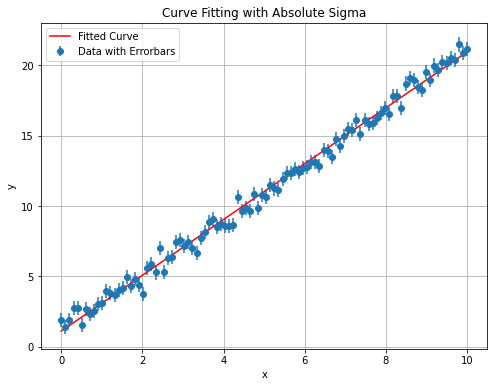

In [21]:
#### Example fitting straight line with errors using scipy
from scipy.optimize import curve_fit

# Define the model function
def model_function(x, a, b):
    return a * x + b

# Generate some example data
np.random.seed(0)
x_data = np.linspace(0, 10, 100)
y_data = 2 * x_data + 1 + np.random.normal(0, 0.5, size=len(x_data))  # Adding noise
sigma_data = np.full_like(y_data, 0.5)  # Absolute uncertainties in y_data

# Perform curve fitting
popt, pcov = curve_fit(model_function, x_data, y_data, sigma=sigma_data, absolute_sigma=True)

# Print the optimized parameters
print("Optimized parameters (a, b):", popt)

# Print the covariance matrix
print("Covariance matrix:")
print(pcov)

# Extract the standard deviations (errors) on the parameters from the covariance matrix
perr = np.sqrt(np.diag(pcov))

# Define parameter names
param_names = ['a', 'b']

# Print the optimized parameters and their errors
print("Optimized parameters:")
for name, value, error in zip(param_names, popt, perr):
    print("{} = {:.3f} ± {:.3f}".format(name, value, error))

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=sigma_data, fmt='o', label='Data with Errorbars')
plt.plot(x_data, model_function(x_data, *popt), label='Fitted Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting with Absolute Sigma')
plt.legend()
plt.grid(True)
plt.show()

<font color='red'>Class exercise: Show that the equations above indeed are minima of the $\chi^2$ (not maxima or saddle points) </font>


## Deciding between different models: how to choose between different fitting functions

Say we have a set of data and one theory tells us we should expect a linear function $p(x) = c_0 + c_1 x$ while another theory tells us we should expect a quadratic dependence: $q(x) = c_0 + c_1 x + c_2 x^2$.

How do we distinguish which is more plausible, given the data we have? In other words, which function is a better description of the data?

Here's a typical way this is solved:
* perform a least-squares fit of each function to the data, i.e. find the parameters that minimize the $\chi^2$ in each case.
* calculate the $\chi^2$-per-degree-of-freedom, known as the 'reduced' chi-squared: $\chi^2_{red} = \frac{\chi^2}{n-N}$, where $n$ is the number of data points and $N$ the number of parameters of our fitting function.
* the theory/model/function that gave a value of $\chi^2_{red}$ closer to **1** is the preferred theory.

Another way is to look at the parameter values: if you fit a quadratic function but the $c_2$ term is close to 0, then a linear function is actually preferred.

Optimized parameters (a, b, c): [0.02589999 1.72613375 1.53154197]
Covariance matrix:
[[ 4.32484361e-05 -4.32484364e-04  7.13526380e-04]
 [-4.32484364e-04  4.61890308e-03 -8.60556090e-03]
 [ 7.13526380e-04 -8.60556090e-03  2.16234693e-02]]
Optimized parameters:
a = 0.026 ± 0.007
b = 1.726 ± 0.068
c = 1.532 ± 0.147


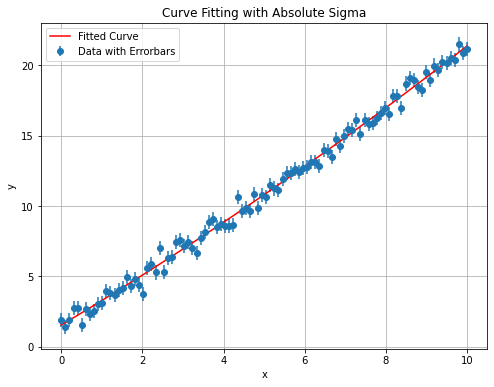

In [22]:
# Example fitting same data but with a quadratic function

# Define the model function (quadratic)
def model_function2(x, a, b, c):
    return a * x**2 + b * x + c


# Perform curve fitting
popt2, pcov2 = curve_fit(model_function2, x_data, y_data, sigma=sigma_data, absolute_sigma=True)

# Print the optimized parameters
print("Optimized parameters (a, b, c):", popt2)

# Print the covariance matrix
print("Covariance matrix:")
print(pcov2)

# Extract the standard deviations (errors) on the parameters from the covariance matrix
perr2 = np.sqrt(np.diag(pcov2))

# Define parameter names
param_names2 = ['a', 'b', 'c']

# Print the optimized parameters and their errors
print("Optimized parameters:")
for name, value, error in zip(param_names2, popt2, perr2):
    print("{} = {:.3f} ± {:.3f}".format(name, value, error))

# Plot the data and the fitted curve
plt.figure(figsize=(8, 6))
plt.errorbar(x_data, y_data, yerr=sigma_data, fmt='o', label='Data with Errorbars')
plt.plot(x_data, model_function2(x_data, *popt2), label='Fitted Curve', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting with Absolute Sigma')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# Calculate the chi-square
residuals = y_data - model_function(x_data, *popt)
chi_square = np.sum((residuals / sigma_data)**2)

# Calculate the degrees of freedom
dof = len(y_data) - len(popt)

# Calculate the reduced chi-square
chi_square_red = chi_square / dof

print("Reduced chi-square - linear fit:", chi_square_red)



# Calculate the chi-square
residuals = y_data - model_function2(x_data, *popt2)
chi_square = np.sum((residuals / sigma_data)**2)

# Calculate the degrees of freedom
dof = len(y_data) - len(popt2)

# Calculate the reduced chi-square
chi_square_red = chi_square / dof

print("Reduced chi-square - quadratic fit:", chi_square_red)

Reduced chi-square - linear fit: 1.028888625988379
Reduced chi-square - quadratic fit: 0.8795925764950829


In [26]:
1.028-1, np.abs(0.879-1)

(0.028000000000000025, 0.121)